In [6]:
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

notebook_path = 'path\\to\\where\\inputfiles\\are'

num_classes = 8
input_shape = (11, 20, 1)
num_splits = 3
batch_size  = 32
epochs = 1000

#define per-fold score containers
acc_per_fold = []
loss_per_fold = []

#will hold the history of a single split's accuracy
all_history = [0 for i in range(num_splits)]

trainin = open(notebook_path+'2d_trainin.txt', 'r') #not appended with bias value
trainout = open(notebook_path+'all_trainout_8.txt', 'r')
testin = open(notebook_path+'2d_testin.txt', 'r')
testout = open(notebook_path+'all_testout_8.txt', 'r')

trainin_matrix = np.zeros((0, 11, 20, 1))
trainout_matrix = np.zeros((0, 8))
testin_matrix = np.zeros((0, 11, 20, 1))
testout_matrix = np.zeros((0, 8))

while True:
    inline = trainin.readline()
    outline = trainout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    this_matrix = np.zeros((0, 20, 1))
    arr_i = 0
    for j in range(11):
        this_row = np.zeros((20, 1))
        for i in range(20):
            this_row[i] = float(in_num[arr_i])
        this_matrix = np.append(this_matrix,[this_row], axis=0)
        arr_i += 1
    trainin_matrix = np.append(trainin_matrix,[this_matrix], axis=0)
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    trainout_matrix = np.append(trainout_matrix,[out_num], axis=0)

while True:
    inline = testin.readline()
    outline = testout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    this_matrix = np.zeros((0, 20, 1))
    arr_i = 0
    for j in range(11):
        this_row = np.zeros((20, 1))
        for i in range(20):
            this_row[i] = float(in_num[arr_i])
        this_matrix = np.append(this_matrix,[this_row], axis=0)
        arr_i += 1
    testin_matrix = np.append(testin_matrix,[this_matrix], axis=0)
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    testout_matrix = np.append(testout_matrix,[out_num], axis=0)

print(trainin_matrix.shape)
print(trainout_matrix.shape)
print(testin_matrix.shape)
print(testout_matrix.shape)

# Merge inputs and targets
inputs = np.concatenate((trainin_matrix, testin_matrix), axis=0)
targets = np.concatenate((trainout_matrix, testout_matrix), axis=0)

print(inputs.shape)
print(targets.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_splits, shuffle=True)

(2346, 11, 20, 1)
(2346, 8)
(807, 11, 20, 1)
(807, 8)
(3153, 11, 20, 1)
(3153, 8)


In [7]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    #model.summary()

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(inputs[train], targets[train], batch_size=batch_size, epochs=epochs, validation_split=0.1)
    
    all_history[fold_no-1] = history
    
    score = model.evaluate(inputs[test], targets[test], verbose=0)

    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1]*100}%')
    acc_per_fold.append(score[1] * 100)
    loss_per_fold.append(score[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/1000
60/60 [==============================] - 1s 6ms/step - loss: 2.0334 - accuracy: 0.2158 - val_loss: 2.0473 - val_accuracy: 0.1327
Epoch 2/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.9814 - accuracy: 0.2380 - val_loss: 2.0588 - val_accuracy: 0.1327
Epoch 3/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.9513 - accuracy: 0.2448 - val_loss: 2.0902 - val_accuracy: 0.1327
Epoch 4/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.9175 - accuracy: 0.2522 - val_loss: 2.1279 - val_accuracy: 0.1327
Epoch 5/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.8973 - accuracy: 0.2522 - val_loss: 2.1386 - val_accuracy: 0.1327
Epoch 6/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.8854 - accuracy: 0.2607 - val_loss: 2.1809 - val_accuracy: 0.1327
Epoch 7/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.8788 - accuracy: 0.2544 - val_loss: 2.2305 - val_accuracy: 0.1327
Epoch 

60/60 [==============================] - 0s 4ms/step - loss: 1.7428 - accuracy: 0.2930 - val_loss: 2.9180 - val_accuracy: 0.1232
Epoch 116/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7304 - accuracy: 0.3120 - val_loss: 2.9586 - val_accuracy: 0.1611
Epoch 117/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7443 - accuracy: 0.2940 - val_loss: 2.9015 - val_accuracy: 0.1232
Epoch 118/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7449 - accuracy: 0.3014 - val_loss: 2.9212 - val_accuracy: 0.1232
Epoch 119/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7382 - accuracy: 0.2983 - val_loss: 3.0205 - val_accuracy: 0.1280
Epoch 120/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7449 - accuracy: 0.2967 - val_loss: 2.9432 - val_accuracy: 0.1280
Epoch 121/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7406 - accuracy: 0.3041 - val_loss: 2.9395 - val_accuracy: 0.1232
Epoch 1

Epoch 172/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7299 - accuracy: 0.3162 - val_loss: 3.0751 - val_accuracy: 0.1232
Epoch 173/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7261 - accuracy: 0.3035 - val_loss: 2.9243 - val_accuracy: 0.1232
Epoch 174/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7365 - accuracy: 0.3067 - val_loss: 3.0048 - val_accuracy: 0.1327
Epoch 175/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7251 - accuracy: 0.3104 - val_loss: 3.0426 - val_accuracy: 0.1280
Epoch 176/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7244 - accuracy: 0.3125 - val_loss: 2.9366 - val_accuracy: 0.1374
Epoch 177/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7347 - accuracy: 0.2993 - val_loss: 3.0616 - val_accuracy: 0.1280
Epoch 178/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7303 - accuracy: 0.3030 - val_loss: 2.9652 - val_accuracy:

Epoch 229/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7209 - accuracy: 0.3125 - val_loss: 3.0683 - val_accuracy: 0.1327
Epoch 230/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7209 - accuracy: 0.3030 - val_loss: 3.0892 - val_accuracy: 0.1327
Epoch 231/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7153 - accuracy: 0.3136 - val_loss: 3.0656 - val_accuracy: 0.1280
Epoch 232/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7170 - accuracy: 0.3168 - val_loss: 3.0601 - val_accuracy: 0.1280
Epoch 233/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7202 - accuracy: 0.3152 - val_loss: 3.0434 - val_accuracy: 0.1280
Epoch 234/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7146 - accuracy: 0.3109 - val_loss: 3.1404 - val_accuracy: 0.1280
Epoch 235/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7179 - accuracy: 0.3083 - val_loss: 3.0840 - val_accuracy:

Epoch 286/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7048 - accuracy: 0.3136 - val_loss: 3.3332 - val_accuracy: 0.1280
Epoch 287/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7151 - accuracy: 0.3035 - val_loss: 3.2537 - val_accuracy: 0.1280
Epoch 288/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7065 - accuracy: 0.3157 - val_loss: 3.2560 - val_accuracy: 0.1280
Epoch 289/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7042 - accuracy: 0.3104 - val_loss: 3.2717 - val_accuracy: 0.1280
Epoch 290/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7132 - accuracy: 0.3083 - val_loss: 3.1877 - val_accuracy: 0.1706
Epoch 291/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7104 - accuracy: 0.3109 - val_loss: 3.2363 - val_accuracy: 0.1280
Epoch 292/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7108 - accuracy: 0.3030 - val_loss: 3.2556 - val_accuracy:

Epoch 343/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7086 - accuracy: 0.3173 - val_loss: 3.5419 - val_accuracy: 0.1280
Epoch 344/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6998 - accuracy: 0.3099 - val_loss: 3.5860 - val_accuracy: 0.1280
Epoch 345/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7094 - accuracy: 0.3104 - val_loss: 3.5056 - val_accuracy: 0.1280
Epoch 346/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7003 - accuracy: 0.3194 - val_loss: 3.4602 - val_accuracy: 0.1280
Epoch 347/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6954 - accuracy: 0.3173 - val_loss: 3.5182 - val_accuracy: 0.1280
Epoch 348/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7044 - accuracy: 0.3178 - val_loss: 3.5468 - val_accuracy: 0.1280
Epoch 349/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6996 - accuracy: 0.3226 - val_loss: 3.4760 - val_accuracy:

Epoch 400/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7024 - accuracy: 0.3199 - val_loss: 3.3497 - val_accuracy: 0.0995
Epoch 401/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7054 - accuracy: 0.3120 - val_loss: 3.4237 - val_accuracy: 0.1280
Epoch 402/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7111 - accuracy: 0.3173 - val_loss: 3.4994 - val_accuracy: 0.1280
Epoch 403/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6985 - accuracy: 0.3205 - val_loss: 3.3262 - val_accuracy: 0.1280
Epoch 404/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7073 - accuracy: 0.3146 - val_loss: 3.4298 - val_accuracy: 0.1280
Epoch 405/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6946 - accuracy: 0.3252 - val_loss: 3.6124 - val_accuracy: 0.1280
Epoch 406/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7069 - accuracy: 0.3242 - val_loss: 3.4886 - val_accuracy:

Epoch 457/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6981 - accuracy: 0.3189 - val_loss: 3.5769 - val_accuracy: 0.1327
Epoch 458/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6983 - accuracy: 0.3168 - val_loss: 3.5943 - val_accuracy: 0.1280
Epoch 459/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6987 - accuracy: 0.3173 - val_loss: 3.7632 - val_accuracy: 0.0995
Epoch 460/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6987 - accuracy: 0.3231 - val_loss: 3.7135 - val_accuracy: 0.1280
Epoch 461/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6992 - accuracy: 0.3131 - val_loss: 3.6137 - val_accuracy: 0.1043
Epoch 462/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7000 - accuracy: 0.3020 - val_loss: 3.6460 - val_accuracy: 0.1043
Epoch 463/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6973 - accuracy: 0.3210 - val_loss: 3.6737 - val_accuracy:

Epoch 514/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6901 - accuracy: 0.3221 - val_loss: 3.9001 - val_accuracy: 0.1043
Epoch 515/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6904 - accuracy: 0.3242 - val_loss: 3.8685 - val_accuracy: 0.1043
Epoch 516/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6986 - accuracy: 0.3131 - val_loss: 3.9267 - val_accuracy: 0.1043
Epoch 517/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6930 - accuracy: 0.3194 - val_loss: 3.7447 - val_accuracy: 0.0995
Epoch 518/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6940 - accuracy: 0.3078 - val_loss: 3.6655 - val_accuracy: 0.0995
Epoch 519/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6891 - accuracy: 0.3205 - val_loss: 3.7119 - val_accuracy: 0.0995
Epoch 520/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6948 - accuracy: 0.3125 - val_loss: 3.7082 - val_accuracy:

Epoch 571/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6960 - accuracy: 0.3189 - val_loss: 3.8499 - val_accuracy: 0.1043
Epoch 572/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7005 - accuracy: 0.3194 - val_loss: 3.9401 - val_accuracy: 0.1043
Epoch 573/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6914 - accuracy: 0.3131 - val_loss: 4.0538 - val_accuracy: 0.1043
Epoch 574/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6825 - accuracy: 0.3210 - val_loss: 3.9495 - val_accuracy: 0.1043
Epoch 575/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6891 - accuracy: 0.3199 - val_loss: 3.9434 - val_accuracy: 0.0995
Epoch 576/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6925 - accuracy: 0.3242 - val_loss: 3.9147 - val_accuracy: 0.0995
Epoch 577/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6908 - accuracy: 0.3189 - val_loss: 3.8252 - val_accuracy:

Epoch 628/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6886 - accuracy: 0.3205 - val_loss: 3.8790 - val_accuracy: 0.1090
Epoch 629/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6955 - accuracy: 0.3125 - val_loss: 3.8820 - val_accuracy: 0.1043
Epoch 630/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6908 - accuracy: 0.3168 - val_loss: 3.9173 - val_accuracy: 0.1043
Epoch 631/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6911 - accuracy: 0.3152 - val_loss: 3.9555 - val_accuracy: 0.1043
Epoch 632/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6909 - accuracy: 0.3162 - val_loss: 3.8803 - val_accuracy: 0.1043
Epoch 633/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6979 - accuracy: 0.3226 - val_loss: 4.0431 - val_accuracy: 0.1090
Epoch 634/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6938 - accuracy: 0.3157 - val_loss: 4.1109 - val_accuracy:

Epoch 685/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6882 - accuracy: 0.3210 - val_loss: 4.2157 - val_accuracy: 0.1090
Epoch 686/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6920 - accuracy: 0.3258 - val_loss: 4.0497 - val_accuracy: 0.1090
Epoch 687/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6983 - accuracy: 0.3162 - val_loss: 4.0336 - val_accuracy: 0.1090
Epoch 688/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6950 - accuracy: 0.3072 - val_loss: 3.7735 - val_accuracy: 0.1090
Epoch 689/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6962 - accuracy: 0.3199 - val_loss: 4.0268 - val_accuracy: 0.1090
Epoch 690/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7060 - accuracy: 0.3231 - val_loss: 4.0319 - val_accuracy: 0.1043
Epoch 691/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6933 - accuracy: 0.3231 - val_loss: 3.9786 - val_accuracy:

Epoch 742/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6865 - accuracy: 0.3215 - val_loss: 4.1177 - val_accuracy: 0.1043
Epoch 743/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6926 - accuracy: 0.3236 - val_loss: 4.1762 - val_accuracy: 0.1043
Epoch 744/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6951 - accuracy: 0.3268 - val_loss: 4.3394 - val_accuracy: 0.1043
Epoch 745/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6894 - accuracy: 0.3289 - val_loss: 3.8733 - val_accuracy: 0.1043
Epoch 746/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6888 - accuracy: 0.3273 - val_loss: 3.9673 - val_accuracy: 0.1043
Epoch 747/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6980 - accuracy: 0.3120 - val_loss: 4.1419 - val_accuracy: 0.1043
Epoch 748/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6917 - accuracy: 0.3199 - val_loss: 4.1093 - val_accuracy:

Epoch 799/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6869 - accuracy: 0.3173 - val_loss: 4.2221 - val_accuracy: 0.1043
Epoch 800/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6944 - accuracy: 0.3099 - val_loss: 4.3663 - val_accuracy: 0.0995
Epoch 801/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6955 - accuracy: 0.3205 - val_loss: 4.5875 - val_accuracy: 0.1090
Epoch 802/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6911 - accuracy: 0.3146 - val_loss: 4.3421 - val_accuracy: 0.1090
Epoch 803/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6903 - accuracy: 0.3215 - val_loss: 4.3247 - val_accuracy: 0.1090
Epoch 804/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6900 - accuracy: 0.3236 - val_loss: 4.4958 - val_accuracy: 0.1090
Epoch 805/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6853 - accuracy: 0.3221 - val_loss: 4.5389 - val_accuracy:

Epoch 856/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6846 - accuracy: 0.3215 - val_loss: 4.4353 - val_accuracy: 0.1090
Epoch 857/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7021 - accuracy: 0.3252 - val_loss: 4.0545 - val_accuracy: 0.1517
Epoch 858/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6898 - accuracy: 0.3178 - val_loss: 4.4080 - val_accuracy: 0.1090
Epoch 859/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6878 - accuracy: 0.3168 - val_loss: 4.3367 - val_accuracy: 0.1090
Epoch 860/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6930 - accuracy: 0.3173 - val_loss: 4.3575 - val_accuracy: 0.1090
Epoch 861/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6943 - accuracy: 0.3152 - val_loss: 4.3515 - val_accuracy: 0.1137
Epoch 862/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6848 - accuracy: 0.3231 - val_loss: 4.3899 - val_accuracy:

Epoch 913/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6868 - accuracy: 0.3236 - val_loss: 4.4401 - val_accuracy: 0.1090
Epoch 914/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6848 - accuracy: 0.3178 - val_loss: 4.3947 - val_accuracy: 0.1090
Epoch 915/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6873 - accuracy: 0.3189 - val_loss: 4.5867 - val_accuracy: 0.1090
Epoch 916/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6889 - accuracy: 0.3194 - val_loss: 4.3796 - val_accuracy: 0.1137
Epoch 917/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6896 - accuracy: 0.3178 - val_loss: 4.5212 - val_accuracy: 0.1090
Epoch 918/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6856 - accuracy: 0.3231 - val_loss: 4.6230 - val_accuracy: 0.1090
Epoch 919/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6814 - accuracy: 0.3252 - val_loss: 4.5844 - val_accuracy:

Epoch 970/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6903 - accuracy: 0.3310 - val_loss: 4.5765 - val_accuracy: 0.1090
Epoch 971/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6892 - accuracy: 0.3189 - val_loss: 4.6370 - val_accuracy: 0.1090
Epoch 972/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6878 - accuracy: 0.3194 - val_loss: 4.5742 - val_accuracy: 0.1090
Epoch 973/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6861 - accuracy: 0.3168 - val_loss: 4.6670 - val_accuracy: 0.1090
Epoch 974/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6911 - accuracy: 0.3162 - val_loss: 4.6730 - val_accuracy: 0.1090
Epoch 975/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6866 - accuracy: 0.3194 - val_loss: 4.8241 - val_accuracy: 0.1090
Epoch 976/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6903 - accuracy: 0.3178 - val_loss: 4.7616 - val_accuracy:

60/60 [==============================] - 0s 4ms/step - loss: 1.7455 - accuracy: 0.3014 - val_loss: 2.9761 - val_accuracy: 0.1564
Epoch 84/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7510 - accuracy: 0.3157 - val_loss: 3.0077 - val_accuracy: 0.1469
Epoch 85/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7447 - accuracy: 0.3035 - val_loss: 2.9722 - val_accuracy: 0.1469
Epoch 86/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7588 - accuracy: 0.2967 - val_loss: 3.0134 - val_accuracy: 0.1422
Epoch 87/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7499 - accuracy: 0.2924 - val_loss: 3.0629 - val_accuracy: 0.1611
Epoch 88/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7530 - accuracy: 0.2972 - val_loss: 3.0613 - val_accuracy: 0.1611
Epoch 89/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7474 - accuracy: 0.3046 - val_loss: 3.0849 - val_accuracy: 0.1422
Epoch 90/1000

Epoch 197/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7159 - accuracy: 0.3226 - val_loss: 3.7974 - val_accuracy: 0.1659
Epoch 198/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7234 - accuracy: 0.3094 - val_loss: 3.8755 - val_accuracy: 0.1659
Epoch 199/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7186 - accuracy: 0.3141 - val_loss: 3.9242 - val_accuracy: 0.1659
Epoch 200/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7211 - accuracy: 0.3194 - val_loss: 3.8217 - val_accuracy: 0.1659
Epoch 201/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7240 - accuracy: 0.3099 - val_loss: 3.7662 - val_accuracy: 0.1659
Epoch 202/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7194 - accuracy: 0.3146 - val_loss: 3.9201 - val_accuracy: 0.1659
Epoch 203/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7183 - accuracy: 0.3136 - val_loss: 3.8584 - val_accuracy:

Epoch 254/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7113 - accuracy: 0.3146 - val_loss: 4.2814 - val_accuracy: 0.1659
Epoch 255/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7213 - accuracy: 0.3120 - val_loss: 4.1239 - val_accuracy: 0.1659
Epoch 256/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7284 - accuracy: 0.3099 - val_loss: 4.1354 - val_accuracy: 0.1659
Epoch 257/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7196 - accuracy: 0.3136 - val_loss: 4.2307 - val_accuracy: 0.1659
Epoch 258/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7177 - accuracy: 0.3136 - val_loss: 4.2678 - val_accuracy: 0.1659
Epoch 259/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7184 - accuracy: 0.3088 - val_loss: 4.1909 - val_accuracy: 0.1659
Epoch 260/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7172 - accuracy: 0.3062 - val_loss: 4.2551 - val_accuracy:

Epoch 311/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7158 - accuracy: 0.3152 - val_loss: 4.4482 - val_accuracy: 0.1659
Epoch 312/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7170 - accuracy: 0.3083 - val_loss: 4.3493 - val_accuracy: 0.1659
Epoch 313/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7166 - accuracy: 0.3231 - val_loss: 4.2658 - val_accuracy: 0.1611
Epoch 314/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7094 - accuracy: 0.3215 - val_loss: 4.4429 - val_accuracy: 0.1659
Epoch 315/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7054 - accuracy: 0.3120 - val_loss: 4.4158 - val_accuracy: 0.1659
Epoch 316/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7063 - accuracy: 0.3168 - val_loss: 4.3902 - val_accuracy: 0.1659
Epoch 317/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7079 - accuracy: 0.3210 - val_loss: 4.4659 - val_accuracy:

Epoch 368/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7047 - accuracy: 0.3184 - val_loss: 4.7360 - val_accuracy: 0.1611
Epoch 369/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7074 - accuracy: 0.3168 - val_loss: 4.5611 - val_accuracy: 0.1611
Epoch 370/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7074 - accuracy: 0.3178 - val_loss: 4.5469 - val_accuracy: 0.1280
Epoch 371/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7067 - accuracy: 0.3168 - val_loss: 4.5686 - val_accuracy: 0.1611
Epoch 372/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7059 - accuracy: 0.3162 - val_loss: 4.6490 - val_accuracy: 0.1611
Epoch 373/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7090 - accuracy: 0.3194 - val_loss: 4.5932 - val_accuracy: 0.1469
Epoch 374/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7065 - accuracy: 0.3152 - val_loss: 4.5611 - val_accuracy:

Epoch 425/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7114 - accuracy: 0.3162 - val_loss: 4.4736 - val_accuracy: 0.1327
Epoch 426/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6994 - accuracy: 0.3210 - val_loss: 4.4240 - val_accuracy: 0.1327
Epoch 427/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7125 - accuracy: 0.3152 - val_loss: 4.4743 - val_accuracy: 0.1327
Epoch 428/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7057 - accuracy: 0.3162 - val_loss: 4.5195 - val_accuracy: 0.1280
Epoch 429/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7010 - accuracy: 0.3221 - val_loss: 4.5649 - val_accuracy: 0.1280
Epoch 430/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7073 - accuracy: 0.3189 - val_loss: 4.4946 - val_accuracy: 0.1280
Epoch 431/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7059 - accuracy: 0.3157 - val_loss: 4.7073 - val_accuracy:

Epoch 482/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6931 - accuracy: 0.3162 - val_loss: 4.6687 - val_accuracy: 0.1280
Epoch 483/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7004 - accuracy: 0.3109 - val_loss: 4.5926 - val_accuracy: 0.1280
Epoch 484/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7004 - accuracy: 0.3115 - val_loss: 4.6209 - val_accuracy: 0.1327
Epoch 485/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6975 - accuracy: 0.3236 - val_loss: 4.4766 - val_accuracy: 0.1327
Epoch 486/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6977 - accuracy: 0.3295 - val_loss: 4.6370 - val_accuracy: 0.1327
Epoch 487/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6984 - accuracy: 0.3221 - val_loss: 4.5668 - val_accuracy: 0.1280
Epoch 488/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.7039 - accuracy: 0.3099 - val_loss: 4.3846 - val_accuracy:

Epoch 539/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6933 - accuracy: 0.3178 - val_loss: 4.7588 - val_accuracy: 0.1280
Epoch 540/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6917 - accuracy: 0.3194 - val_loss: 4.8604 - val_accuracy: 0.1280
Epoch 541/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6935 - accuracy: 0.3205 - val_loss: 4.8101 - val_accuracy: 0.1280
Epoch 542/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6958 - accuracy: 0.3178 - val_loss: 4.9645 - val_accuracy: 0.1232
Epoch 543/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7036 - accuracy: 0.3136 - val_loss: 4.8972 - val_accuracy: 0.1232
Epoch 544/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6997 - accuracy: 0.3173 - val_loss: 4.8167 - val_accuracy: 0.1280
Epoch 545/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6894 - accuracy: 0.3157 - val_loss: 4.9799 - val_accuracy:

Epoch 596/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7042 - accuracy: 0.3226 - val_loss: 4.6042 - val_accuracy: 0.1327
Epoch 597/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7031 - accuracy: 0.3231 - val_loss: 4.9024 - val_accuracy: 0.1280
Epoch 598/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7063 - accuracy: 0.3168 - val_loss: 4.9841 - val_accuracy: 0.1280
Epoch 599/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6871 - accuracy: 0.3268 - val_loss: 5.0045 - val_accuracy: 0.1280
Epoch 600/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7016 - accuracy: 0.3115 - val_loss: 4.9396 - val_accuracy: 0.1280
Epoch 601/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6990 - accuracy: 0.3115 - val_loss: 4.8340 - val_accuracy: 0.1280
Epoch 602/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6950 - accuracy: 0.3189 - val_loss: 4.9041 - val_accuracy:

Epoch 653/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6927 - accuracy: 0.3173 - val_loss: 5.0942 - val_accuracy: 0.1280
Epoch 654/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6929 - accuracy: 0.3226 - val_loss: 4.8957 - val_accuracy: 0.1232
Epoch 655/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6867 - accuracy: 0.3210 - val_loss: 5.2421 - val_accuracy: 0.1280
Epoch 656/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6951 - accuracy: 0.3078 - val_loss: 5.0533 - val_accuracy: 0.1280
Epoch 657/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6977 - accuracy: 0.3152 - val_loss: 5.1316 - val_accuracy: 0.1280
Epoch 658/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6943 - accuracy: 0.3178 - val_loss: 5.1752 - val_accuracy: 0.1280
Epoch 659/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6955 - accuracy: 0.3210 - val_loss: 4.7658 - val_accuracy:

Epoch 710/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6859 - accuracy: 0.3242 - val_loss: 5.0511 - val_accuracy: 0.1280
Epoch 711/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6832 - accuracy: 0.3231 - val_loss: 5.2103 - val_accuracy: 0.1280
Epoch 712/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6974 - accuracy: 0.3083 - val_loss: 5.1291 - val_accuracy: 0.1137
Epoch 713/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6941 - accuracy: 0.3273 - val_loss: 5.1478 - val_accuracy: 0.1232
Epoch 714/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6889 - accuracy: 0.3205 - val_loss: 5.0600 - val_accuracy: 0.1232
Epoch 715/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6924 - accuracy: 0.3184 - val_loss: 5.0687 - val_accuracy: 0.1280
Epoch 716/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6893 - accuracy: 0.3258 - val_loss: 5.1540 - val_accuracy:

Epoch 767/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6866 - accuracy: 0.3273 - val_loss: 5.2498 - val_accuracy: 0.1280
Epoch 768/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6879 - accuracy: 0.3162 - val_loss: 5.2164 - val_accuracy: 0.1280
Epoch 769/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6943 - accuracy: 0.3221 - val_loss: 5.2028 - val_accuracy: 0.1280
Epoch 770/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6898 - accuracy: 0.3252 - val_loss: 5.1958 - val_accuracy: 0.1280
Epoch 771/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6919 - accuracy: 0.3141 - val_loss: 5.2318 - val_accuracy: 0.1280
Epoch 772/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6989 - accuracy: 0.3205 - val_loss: 5.1386 - val_accuracy: 0.1280
Epoch 773/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6961 - accuracy: 0.3263 - val_loss: 5.1607 - val_accuracy:

Epoch 824/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6908 - accuracy: 0.3120 - val_loss: 5.3995 - val_accuracy: 0.1280
Epoch 825/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6887 - accuracy: 0.3295 - val_loss: 5.4167 - val_accuracy: 0.1280
Epoch 826/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6911 - accuracy: 0.3221 - val_loss: 5.5215 - val_accuracy: 0.1280
Epoch 827/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6915 - accuracy: 0.3242 - val_loss: 5.4381 - val_accuracy: 0.1280
Epoch 828/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6890 - accuracy: 0.3199 - val_loss: 5.5430 - val_accuracy: 0.1280
Epoch 829/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6989 - accuracy: 0.3210 - val_loss: 5.3362 - val_accuracy: 0.1280
Epoch 830/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6924 - accuracy: 0.3173 - val_loss: 5.6284 - val_accuracy:

Epoch 881/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6892 - accuracy: 0.3289 - val_loss: 5.2985 - val_accuracy: 0.1280
Epoch 882/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6952 - accuracy: 0.3115 - val_loss: 5.3853 - val_accuracy: 0.1232
Epoch 883/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6904 - accuracy: 0.3231 - val_loss: 5.3856 - val_accuracy: 0.1280
Epoch 884/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6924 - accuracy: 0.3252 - val_loss: 5.3801 - val_accuracy: 0.1280
Epoch 885/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6947 - accuracy: 0.3210 - val_loss: 5.4150 - val_accuracy: 0.1232
Epoch 886/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6845 - accuracy: 0.3321 - val_loss: 5.5038 - val_accuracy: 0.1232
Epoch 887/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6840 - accuracy: 0.3146 - val_loss: 5.5663 - val_accuracy:

Epoch 938/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6876 - accuracy: 0.3210 - val_loss: 5.5341 - val_accuracy: 0.1280
Epoch 939/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6786 - accuracy: 0.3268 - val_loss: 5.4731 - val_accuracy: 0.1232
Epoch 940/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6895 - accuracy: 0.3236 - val_loss: 5.5468 - val_accuracy: 0.1280
Epoch 941/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6842 - accuracy: 0.3157 - val_loss: 5.5812 - val_accuracy: 0.1280
Epoch 942/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6935 - accuracy: 0.3178 - val_loss: 5.4273 - val_accuracy: 0.1280
Epoch 943/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6880 - accuracy: 0.3210 - val_loss: 5.4165 - val_accuracy: 0.1232
Epoch 944/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6912 - accuracy: 0.3263 - val_loss: 5.5808 - val_accuracy:

Epoch 995/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6876 - accuracy: 0.3157 - val_loss: 5.8634 - val_accuracy: 0.1280
Epoch 996/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6862 - accuracy: 0.3199 - val_loss: 5.5823 - val_accuracy: 0.1232
Epoch 997/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6942 - accuracy: 0.3184 - val_loss: 5.4596 - val_accuracy: 0.1280
Epoch 998/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6930 - accuracy: 0.3152 - val_loss: 5.5452 - val_accuracy: 0.1280
Epoch 999/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6902 - accuracy: 0.3168 - val_loss: 5.4064 - val_accuracy: 0.1280
Epoch 1000/1000
60/60 [==============================] - 0s 5ms/step - loss: 1.6932 - accuracy: 0.3284 - val_loss: 5.6689 - val_accuracy: 0.1280
Score for fold 2: loss of 2.2576420307159424; accuracy of 27.30732560157776%
Epoch 1/1000
60/60 [==============================] - 1s 6

Epoch 52/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7662 - accuracy: 0.2993 - val_loss: 2.9262 - val_accuracy: 0.1706
Epoch 53/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7446 - accuracy: 0.3210 - val_loss: 2.9640 - val_accuracy: 0.1564
Epoch 54/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7485 - accuracy: 0.3094 - val_loss: 2.9497 - val_accuracy: 0.1706
Epoch 55/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7532 - accuracy: 0.3083 - val_loss: 2.9019 - val_accuracy: 0.1564
Epoch 56/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7554 - accuracy: 0.3009 - val_loss: 2.9406 - val_accuracy: 0.1706
Epoch 57/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7381 - accuracy: 0.3072 - val_loss: 2.9289 - val_accuracy: 0.1706
Epoch 58/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7489 - accuracy: 0.3020 - val_loss: 2.9613 - val_accuracy: 0.1564

Epoch 166/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7122 - accuracy: 0.3199 - val_loss: 3.8738 - val_accuracy: 0.1754
Epoch 167/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7172 - accuracy: 0.3173 - val_loss: 3.8366 - val_accuracy: 0.1754
Epoch 168/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7130 - accuracy: 0.3088 - val_loss: 3.8515 - val_accuracy: 0.1754
Epoch 169/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7058 - accuracy: 0.3215 - val_loss: 3.9330 - val_accuracy: 0.1754
Epoch 170/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7144 - accuracy: 0.3189 - val_loss: 3.8505 - val_accuracy: 0.1754
Epoch 171/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7131 - accuracy: 0.3173 - val_loss: 3.8506 - val_accuracy: 0.1801
Epoch 172/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7135 - accuracy: 0.3263 - val_loss: 3.8562 - val_accuracy:

Epoch 223/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7118 - accuracy: 0.3189 - val_loss: 4.3163 - val_accuracy: 0.1754
Epoch 224/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7063 - accuracy: 0.3263 - val_loss: 4.2304 - val_accuracy: 0.1754
Epoch 225/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7068 - accuracy: 0.3136 - val_loss: 4.2829 - val_accuracy: 0.1754
Epoch 226/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7013 - accuracy: 0.3263 - val_loss: 4.4093 - val_accuracy: 0.1754
Epoch 227/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7049 - accuracy: 0.3332 - val_loss: 4.2918 - val_accuracy: 0.1754
Epoch 228/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7060 - accuracy: 0.3226 - val_loss: 4.5011 - val_accuracy: 0.1801
Epoch 229/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6943 - accuracy: 0.3189 - val_loss: 4.3259 - val_accuracy:

Epoch 280/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6955 - accuracy: 0.3263 - val_loss: 4.8056 - val_accuracy: 0.1801
Epoch 281/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6984 - accuracy: 0.3316 - val_loss: 4.7033 - val_accuracy: 0.1848
Epoch 282/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6883 - accuracy: 0.3236 - val_loss: 4.7670 - val_accuracy: 0.1801
Epoch 283/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6906 - accuracy: 0.3258 - val_loss: 4.8172 - val_accuracy: 0.1801
Epoch 284/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6900 - accuracy: 0.3199 - val_loss: 4.7655 - val_accuracy: 0.1754
Epoch 285/1000
60/60 [==============================] - 0s 5ms/step - loss: 1.6949 - accuracy: 0.3353 - val_loss: 4.6905 - val_accuracy: 0.1754
Epoch 286/1000
60/60 [==============================] - 0s 5ms/step - loss: 1.7035 - accuracy: 0.3184 - val_loss: 4.6749 - val_accuracy:

Epoch 337/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6809 - accuracy: 0.3258 - val_loss: 5.1014 - val_accuracy: 0.1801
Epoch 338/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6882 - accuracy: 0.3236 - val_loss: 5.0420 - val_accuracy: 0.1754
Epoch 339/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.7005 - accuracy: 0.3215 - val_loss: 5.0012 - val_accuracy: 0.1801
Epoch 340/1000
60/60 [==============================] - 0s 5ms/step - loss: 1.6927 - accuracy: 0.3242 - val_loss: 5.2454 - val_accuracy: 0.1754
Epoch 341/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6914 - accuracy: 0.3178 - val_loss: 4.9907 - val_accuracy: 0.1801
Epoch 342/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6953 - accuracy: 0.3310 - val_loss: 5.1223 - val_accuracy: 0.1754
Epoch 343/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6923 - accuracy: 0.3252 - val_loss: 5.1144 - val_accuracy:

Epoch 394/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6894 - accuracy: 0.3258 - val_loss: 5.2819 - val_accuracy: 0.1801
Epoch 395/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6800 - accuracy: 0.3332 - val_loss: 5.3170 - val_accuracy: 0.1801
Epoch 396/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6896 - accuracy: 0.3268 - val_loss: 5.4490 - val_accuracy: 0.1801
Epoch 397/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6891 - accuracy: 0.3347 - val_loss: 5.4087 - val_accuracy: 0.1754
Epoch 398/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6951 - accuracy: 0.3247 - val_loss: 5.5373 - val_accuracy: 0.1848
Epoch 399/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6902 - accuracy: 0.3231 - val_loss: 5.5071 - val_accuracy: 0.1754
Epoch 400/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6916 - accuracy: 0.3347 - val_loss: 5.3943 - val_accuracy:

Epoch 451/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6771 - accuracy: 0.3369 - val_loss: 5.7145 - val_accuracy: 0.1801
Epoch 452/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6883 - accuracy: 0.3342 - val_loss: 5.7171 - val_accuracy: 0.1848
Epoch 453/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6875 - accuracy: 0.3379 - val_loss: 5.8675 - val_accuracy: 0.1801
Epoch 454/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6752 - accuracy: 0.3242 - val_loss: 5.8699 - val_accuracy: 0.1754
Epoch 455/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6874 - accuracy: 0.3226 - val_loss: 5.7285 - val_accuracy: 0.1754
Epoch 456/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6872 - accuracy: 0.3332 - val_loss: 5.7613 - val_accuracy: 0.1754
Epoch 457/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6882 - accuracy: 0.3236 - val_loss: 5.5287 - val_accuracy:

Epoch 508/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6826 - accuracy: 0.3289 - val_loss: 6.2934 - val_accuracy: 0.1801
Epoch 509/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6738 - accuracy: 0.3342 - val_loss: 6.3195 - val_accuracy: 0.1801
Epoch 510/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6784 - accuracy: 0.3427 - val_loss: 6.0358 - val_accuracy: 0.1754
Epoch 511/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6831 - accuracy: 0.3268 - val_loss: 5.9925 - val_accuracy: 0.1801
Epoch 512/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6788 - accuracy: 0.3289 - val_loss: 6.0849 - val_accuracy: 0.1848
Epoch 513/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6743 - accuracy: 0.3215 - val_loss: 6.0954 - val_accuracy: 0.1848
Epoch 514/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6807 - accuracy: 0.3342 - val_loss: 6.1550 - val_accuracy:

Epoch 565/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6829 - accuracy: 0.3226 - val_loss: 6.2992 - val_accuracy: 0.1801
Epoch 566/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6782 - accuracy: 0.3305 - val_loss: 6.1822 - val_accuracy: 0.1848
Epoch 567/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6846 - accuracy: 0.3358 - val_loss: 6.3283 - val_accuracy: 0.1801
Epoch 568/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6766 - accuracy: 0.3258 - val_loss: 6.2073 - val_accuracy: 0.1754
Epoch 569/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6749 - accuracy: 0.3337 - val_loss: 6.2690 - val_accuracy: 0.1754
Epoch 570/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6765 - accuracy: 0.3379 - val_loss: 6.4585 - val_accuracy: 0.1754
Epoch 571/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6811 - accuracy: 0.3115 - val_loss: 6.3409 - val_accuracy:

Epoch 622/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6742 - accuracy: 0.3321 - val_loss: 6.7846 - val_accuracy: 0.1801
Epoch 623/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6794 - accuracy: 0.3411 - val_loss: 6.8877 - val_accuracy: 0.1754
Epoch 624/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6734 - accuracy: 0.3279 - val_loss: 6.6867 - val_accuracy: 0.1801
Epoch 625/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6762 - accuracy: 0.3347 - val_loss: 6.9168 - val_accuracy: 0.1801
Epoch 626/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6752 - accuracy: 0.3437 - val_loss: 6.7431 - val_accuracy: 0.1848
Epoch 627/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6767 - accuracy: 0.3295 - val_loss: 6.7500 - val_accuracy: 0.1848
Epoch 628/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6809 - accuracy: 0.3305 - val_loss: 6.3512 - val_accuracy:

Epoch 679/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6779 - accuracy: 0.3263 - val_loss: 6.9098 - val_accuracy: 0.1754
Epoch 680/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6844 - accuracy: 0.3263 - val_loss: 6.9889 - val_accuracy: 0.1801
Epoch 681/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6732 - accuracy: 0.3326 - val_loss: 7.1491 - val_accuracy: 0.1848
Epoch 682/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6748 - accuracy: 0.3316 - val_loss: 7.2726 - val_accuracy: 0.1801
Epoch 683/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6741 - accuracy: 0.3337 - val_loss: 7.1138 - val_accuracy: 0.1801
Epoch 684/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6752 - accuracy: 0.3332 - val_loss: 7.2065 - val_accuracy: 0.1754
Epoch 685/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6820 - accuracy: 0.3305 - val_loss: 7.3370 - val_accuracy:

Epoch 736/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6692 - accuracy: 0.3453 - val_loss: 7.3575 - val_accuracy: 0.1801
Epoch 737/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6737 - accuracy: 0.3390 - val_loss: 7.0649 - val_accuracy: 0.1801
Epoch 738/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6836 - accuracy: 0.3316 - val_loss: 7.2499 - val_accuracy: 0.1848
Epoch 739/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6726 - accuracy: 0.3332 - val_loss: 7.1390 - val_accuracy: 0.1801
Epoch 740/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6705 - accuracy: 0.3406 - val_loss: 7.1451 - val_accuracy: 0.1801
Epoch 741/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6791 - accuracy: 0.3284 - val_loss: 7.0797 - val_accuracy: 0.1801
Epoch 742/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6785 - accuracy: 0.3353 - val_loss: 7.1005 - val_accuracy:

Epoch 793/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6712 - accuracy: 0.3337 - val_loss: 6.5739 - val_accuracy: 0.1801
Epoch 794/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6671 - accuracy: 0.3305 - val_loss: 6.8372 - val_accuracy: 0.1848
Epoch 795/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6770 - accuracy: 0.3300 - val_loss: 6.6999 - val_accuracy: 0.1611
Epoch 796/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6714 - accuracy: 0.3421 - val_loss: 7.0780 - val_accuracy: 0.1848
Epoch 797/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6711 - accuracy: 0.3379 - val_loss: 6.6503 - val_accuracy: 0.1659
Epoch 798/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6803 - accuracy: 0.3279 - val_loss: 6.7156 - val_accuracy: 0.1754
Epoch 799/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6623 - accuracy: 0.3326 - val_loss: 7.0154 - val_accuracy:

Epoch 850/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6736 - accuracy: 0.3284 - val_loss: 7.0451 - val_accuracy: 0.1659
Epoch 851/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6746 - accuracy: 0.3379 - val_loss: 6.7717 - val_accuracy: 0.1706
Epoch 852/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6702 - accuracy: 0.3289 - val_loss: 6.6481 - val_accuracy: 0.1659
Epoch 853/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6745 - accuracy: 0.3390 - val_loss: 6.5352 - val_accuracy: 0.1706
Epoch 854/1000
60/60 [==============================] - 0s 5ms/step - loss: 1.6727 - accuracy: 0.3252 - val_loss: 6.9928 - val_accuracy: 0.1611
Epoch 855/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6746 - accuracy: 0.3347 - val_loss: 7.1895 - val_accuracy: 0.1659
Epoch 856/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6753 - accuracy: 0.3305 - val_loss: 6.8792 - val_accuracy:

Epoch 907/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6746 - accuracy: 0.3390 - val_loss: 7.3115 - val_accuracy: 0.1611
Epoch 908/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6654 - accuracy: 0.3379 - val_loss: 7.7835 - val_accuracy: 0.1659
Epoch 909/1000
60/60 [==============================] - 0s 5ms/step - loss: 1.6707 - accuracy: 0.3316 - val_loss: 7.6340 - val_accuracy: 0.1801
Epoch 910/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6724 - accuracy: 0.3358 - val_loss: 7.0760 - val_accuracy: 0.1706
Epoch 911/1000
60/60 [==============================] - 0s 6ms/step - loss: 1.6731 - accuracy: 0.3321 - val_loss: 7.2771 - val_accuracy: 0.1801
Epoch 912/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6685 - accuracy: 0.3411 - val_loss: 7.4482 - val_accuracy: 0.1801
Epoch 913/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6733 - accuracy: 0.3342 - val_loss: 7.6167 - val_accuracy:

Epoch 964/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6699 - accuracy: 0.3358 - val_loss: 7.5797 - val_accuracy: 0.1801
Epoch 965/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6675 - accuracy: 0.3406 - val_loss: 7.5195 - val_accuracy: 0.1706
Epoch 966/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6694 - accuracy: 0.3326 - val_loss: 7.3196 - val_accuracy: 0.1706
Epoch 967/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6738 - accuracy: 0.3337 - val_loss: 7.9651 - val_accuracy: 0.1659
Epoch 968/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6714 - accuracy: 0.3332 - val_loss: 7.5374 - val_accuracy: 0.1848
Epoch 969/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6691 - accuracy: 0.3310 - val_loss: 7.5607 - val_accuracy: 0.1706
Epoch 970/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.6776 - accuracy: 0.3273 - val_loss: 7.1328 - val_accuracy:

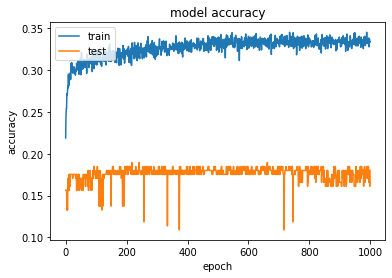

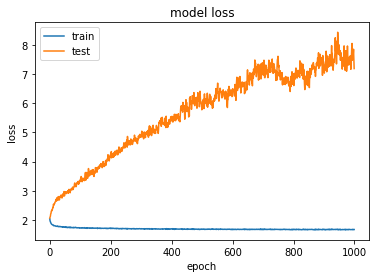

In [8]:
import matplotlib.pyplot as plt

which_split = num_splits - 1
# summarize history for accuracy
plt.plot(all_history[which_split].history['accuracy'])
plt.plot(all_history[which_split].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(all_history[which_split].history['loss'])
plt.plot(all_history[which_split].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
print(np.mean(all_history[which_split].history['accuracy']))
print(np.mean(all_history[which_split].history['val_accuracy']))
print(np.mean(all_history[which_split].history['loss']))
print(np.mean(all_history[which_split].history['val_loss']))

0.3264061342775822
0.17621327286213637
1.6944180639982223
5.678115865945816


In [10]:
print(all_history[which_split].history['accuracy'][999])
print(all_history[which_split].history['val_accuracy'][999])
print(all_history[which_split].history['loss'][999])
print(all_history[which_split].history['val_loss'][999])

0.3342146873474121
0.18009479343891144
1.6721264123916626
7.18843936920166
